In [100]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

Traceback (most recent call last):
  File "C:\Users\Juane\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Juane\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [101]:
#Métodos usados en clase
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id,k):
        
        self.dt  = t[1] - t[0]
        #Forma de denotar el factor de pérdida de energía
        self.k = k
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        #Energía de las partículas)
        self.kE = 0
        self.pE = 0
        self.kEGraph = np.zeros(len(t))
        self.pEGraph = np.zeros(len(t))
        
        
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetEnergy(i,self.v,self.r)
        
       # print(self.r)
        
        # Euler method
        self.r = self.r + (self.dt * self.v)
        self.v = (self.v + (self.dt * self.a))
        
    
    def CheckWallLimits(self,limits,dim):
        #Calculo de energía
        self.kE = 0.5*self.m*(np.dot(self.v,self.v))
        self.pE = self.m*self.r[1]*9.81
        
        #Se adapta el método para que cada vez que toque el piso,
        #este pierda energía y velocidad en función del factor dado (0.9)
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
                self.v *= np.sqrt(self.k)
                
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
                self.v *= np.sqrt(self.k)
                

    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    #Se cambia SetVelocity para que así tenga en cuenta los cambios de energía
    def SetVelocity(self,i,v):
        self.vVector[i] =v 
        
    def SetEnergy(self,i,v,r):
        self.kEGraph[i] = self.kE
        self.pEGraph[i] = self.pE
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    def GetVVelocityVector(self):
        return self.VvVector 

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def GetTEnergy(self):
        return np.array(self.pEGraph)+np.array(self.kEGraph)
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.VvVector = np.array([self.vVector[0]])
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.VvVector = np.vstack([self.VvVector,self.vVector[i]])
                
               # print(self.RrVector)
            
# Discretization
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)
print(len(t))

Limits = np.array([20.,20.])

3001


In [102]:
#Adaptando los métodos originales para que funcionen con condiciones más generales
def GetParticles2(NParticles,Limit,Pos,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.array(Pos)
        v0 = np.array(Velo)
        a0 = np.array([0,-9.81])
        
        p = Particle(x0,v0,a0,t,1.,1.0,i,0.9)
        
        Particles_.append(p)
        
    return Particles_

def RunSimulation2(t,NParticles, Pos,Velo):
    
    Particles = GetParticles2(NParticles,Limits[0],Pos=Pos,Velo = Velo,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits,2)
            Particles[i].Evolution(it)
        
        
    return Particles


r0 = np.array([-15,5])
v0 = np.array([1,0])

Particles2 = RunSimulation2(t,1,r0,v0)

100%|███████████████████████████████████████████████████████████████████████████| 3001/3001 [00:00<00:00, 16731.72it/s]


<IPython.core.display.Javascript object>


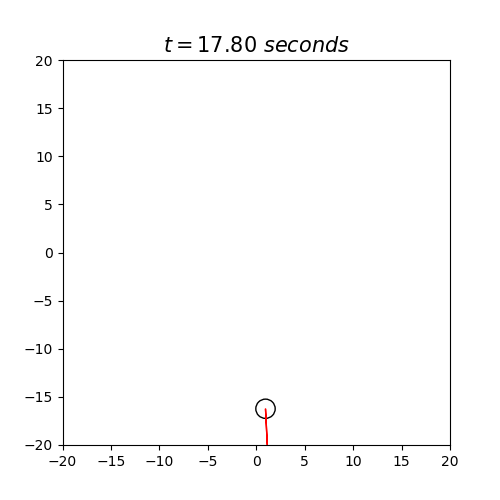

In [103]:
#Métodos dados en clase para animar y reducir el tiempo de animación aplicados a la nueva partícula Particles2

def ReduceTime(t,factor):
    
    for p in Particles2:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


#Se selecciona 10, pues se ve rápido y relativamente fluido a esta tasa
redt = ReduceTime(t,10)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles2:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
        vx = p.GetVVelocityVector()[i,0]
        vy = p.GetVVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        plot = ax.add_patch(circle)
        plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)


<IPython.core.display.Javascript object>


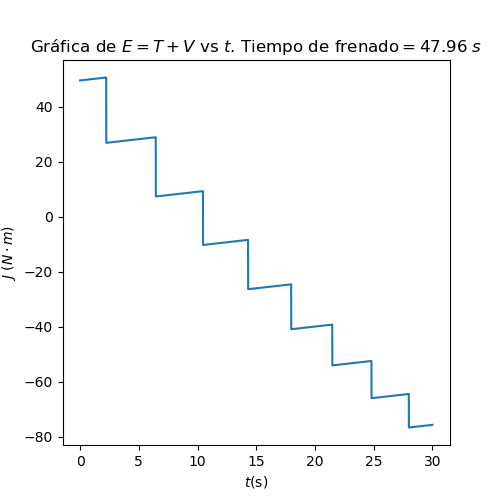

Text(0, 0.5, '$J$ $(N \\cdot m)$')

In [104]:
#Gráfica de la energía total (K+U)
#NOTA: La energía total admite valores negativos, pues la altura también los admite
#únicamente para propósitos de la gráfica
mechEnergy = Particles2[0].GetTEnergy()


#Cálculo del tiempo de frenado por método de Newton-Raphson
def funcVel(n):
    return np.sqrt(9/10)**n
    
def derFuncVel(n):
    dh = 1e-5
    return (funcVel(n+dh/2)-funcVel(n-dh/2))/dh

def tStop(n0):
    #Implementando Newton-Raphson
    iM = 100
    i = 0
    eps = 0.1
    
    while((np.abs(funcVel(n0)))>eps) and (i<iM):
        der = derFuncVel(n0)
        ev = funcVel(n0)
        n0 = n0 - ev/der
        i+=1
        
    return n0

tFinal = tStop(10)

figEnergy = plt.figure(figsize=(5,5))
graph = figEnergy.add_subplot(111)
graph.set_title(f"Gráfica de $E = T+V$ vs $t$. Tiempo de frenado$={tFinal:.2f} \;s$")
graph.plot(t,mechEnergy)
graph.set_xlabel("$t$(s)")
graph.set_ylabel("$J$ $(N \cdot m)$")

In [105]:
#Punto 2, animación de 100 partículas en una caja
#Se adaptan los métodos dados en clase otra vez para obtener velocidades aleatorias 
bounds = np.array([10,10,10])


def GetParticles3(NParticles,Limit,Velo,Dim=3,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i,1)
        
        Particles_.append(p)
        
    return Particles_

def RunSimulation3(t,NParticles, Velo):
    
    Particles = GetParticles3(NParticles,bounds[0],Velo = Velo,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(bounds,3)
            Particles[i].Evolution(it)
        
        
    return Particles

Gas = RunSimulation3(t,100,10)

100%|█████████████████████████████████████████████████████████████████████████████| 3001/3001 [00:10<00:00, 297.15it/s]


<IPython.core.display.Javascript object>


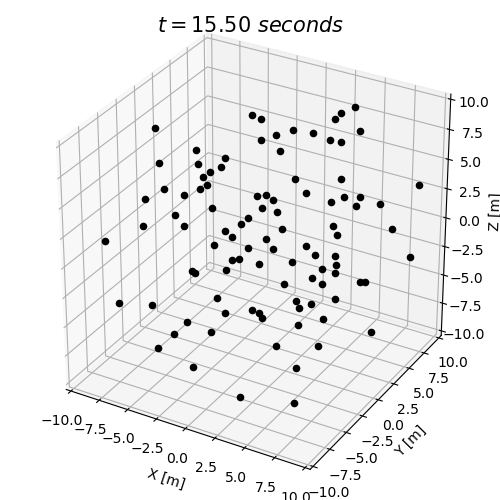

In [106]:
#Reducción de tiempo 3D
def ReduceTime2(t,factor):
    
    for p in Gas:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


#Adaptando el método de animación para que sea 3D
from mpl_toolkits.mplot3d import Axes3D

redt2 = ReduceTime2(t,10)
fig2 = plt.figure(figsize=(5,5))
ax2 = Axes3D(fig2)

def init2():
    ax2.set_xlim3d(-bounds[0],bounds[0])
    ax2.set_ylim3d(-bounds[1],bounds[1])
    ax2.set_zlim3d(-bounds[2],bounds[2])
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    
def Update2(i):
    
    plot = ax2.clear()
    init()
    plot = ax2.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    ax2.set_xlim3d(-bounds[0],bounds[0])
    ax2.set_ylim3d(-bounds[1],bounds[1])
    ax2.set_zlim3d(-bounds[2],bounds[2])
    ax2.set_xlabel("X [m]")
    ax2.set_ylabel("Y [m]")
    ax2.set_zlabel("Z [m]")
    
    for p in Gas:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]
        
        vx = p.GetVVelocityVector()[i,0]
        vy = p.GetVVelocityVector()[i,1]
        vz = p.GetVVelocityVector()[i,2]
        
        ax2.scatter(x,y,z,c="black")
        
    return plot

Animation2 = anim.FuncAnimation(fig2,Update2,frames=len(redt),init_func=init2)